In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_pickle("coalescence_time_statistics.pkl")

ks = [3, 4, 6, 10]
mus = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001, 0.000001]
ss = [0.1, 0.01, 0, -0.01]

C:\Users\hujie\AppData\Local\Temp\ipykernel_6800\2315067740.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  transitivity_df = pd.read_csv(


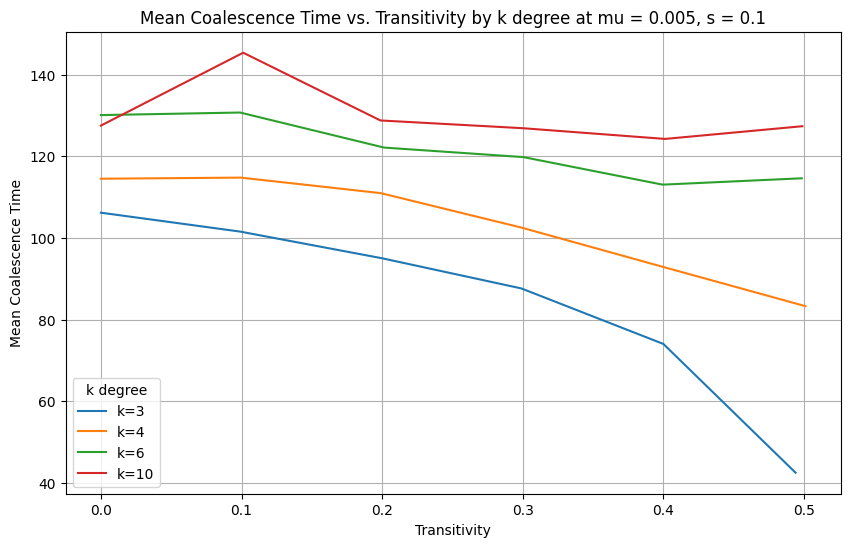

In [6]:
# coalescence time vs transitivity
## Change parameters here
mu_value = 0.005
s_value = 0.1
###########################

transitivity_df = pd.read_csv(
    'regular_graphs/para.txt',
    delim_whitespace=True,
    header=0
)



filtered_coalescence_df = df[
    (df['mu'] == mu_value) & 
    (df['s'] == s_value)
]

merged_df = pd.merge(
    filtered_coalescence_df, 
    transitivity_df, 
    on=['k', 'repetition']
)

plt.figure(figsize=(10, 6))
for k_value in merged_df['k'].unique():
    subset = merged_df[merged_df['k'] == k_value]
    plt.plot(
        subset['transitivity'], 
        subset['mean_coalescence_time_100'], 
        label=f'k={k_value}'
    )

plt.xlabel('Transitivity')
plt.ylabel('Mean Coalescence Time')
plt.title(f'Mean Coalescence Time vs. Transitivity by k degree at mu = {mu_value}, s = {s_value}')
plt.legend(title='k degree')
plt.grid(True)
plt.show()


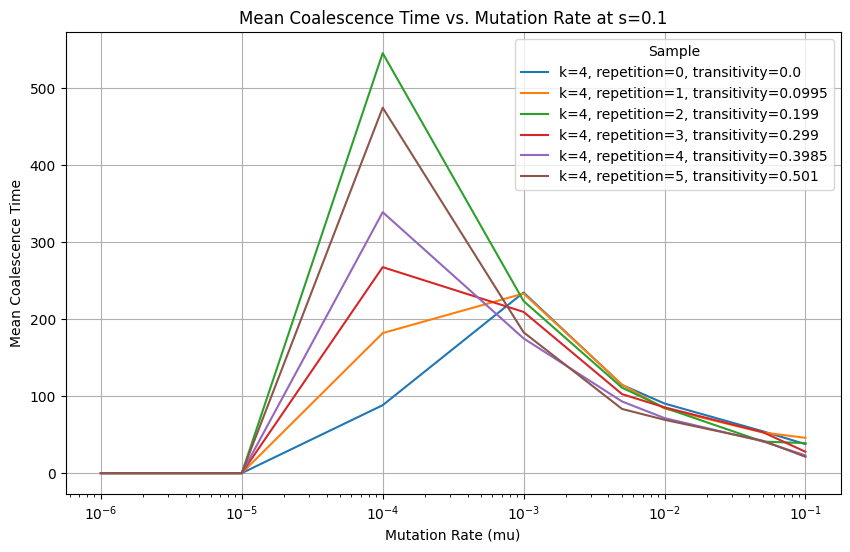

In [9]:
# coalescence time vs mutation
## Change parameters here
s_value = 0.1
selected_samples = [
    (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)
]
#########################

filtered_coalescence_df = df[df['s'] == s_value]

merged_df = pd.merge(
    filtered_coalescence_df, 
    transitivity_df, 
    on=['k', 'repetition']
)

plt.figure(figsize=(10, 6))
for k, repetition in selected_samples:
    subset = merged_df[(merged_df['k'] == k) & (merged_df['repetition'] == repetition)]
    if not subset.empty:
        plt.plot(
            subset['mu'], 
            subset['mean_coalescence_time_100'], 
            label=f'k={k}, repetition={repetition}, transitivity={subset["transitivity"].iloc[0]}'
        )

plt.xscale('log')

plt.xlabel('Mutation Rate (mu)')
plt.ylabel('Mean Coalescence Time')
plt.title(f'Mean Coalescence Time vs. Mutation Rate at s={s_value}')
plt.legend(title='Sample', loc='best')
plt.grid(True)
plt.show()

In [8]:
filtered_coalescence_df

,k,mu,s,repetition,mean_coalescence_time_20,variance_coalescence_time_20,mean_coalescence_time_40,variance_coalescence_time_40,mean_coalescence_time_60,variance_coalescence_time_60,mean_coalescence_time_80,variance_coalescence_time_80,mean_coalescence_time_100,variance_coalescence_time_100
72,3,0.005,0.1,0,105.1570,41.344961,105.97475,36.645445,106.183273,34.152240,106.183273,34.152240,106.183273,34.152240
73,3,0.005,0.1,1,101.3780,49.871696,101.50650,39.244303,101.557091,39.986421,101.557091,39.986421,101.557091,39.986421
74,3,0.005,0.1,2,96.4520,25.385066,95.44175,32.350959,95.020727,29.830585,95.020727,29.830585,95.020727,29.830585
75,3,0.005,0.1,3,88.7140,35.319734,87.70550,34.871175,87.640000,32.398484,87.640000,32.398484,87.640000,32.398484
76,3,0.005,0.1,4,73.0580,48.871616,73.12225,45.562147,74.045091,49.362945,74.045091,49.362945,74.045091,49.362945
77,3,0.005,0.1,5,41.6455,144.350935,42.94625,115.542503,42.516545,150.508939,42.516545,150.508939,42.516545,150.508939
264,4,0.005,0.1,0,114.5000,0.250000,114.50000,0.250000,114.500000,0.250000,114.500000,0.250000,114.500000,0.250000
265,4,0.005,0.1,1,114.7700,76.387600,114.77000,76.387600,114.770000,76.387600,114.770000,76.387600,114.770000,76.387600
266,4,0.005,0.1,2,110.9750,98.109025,110.97500,98.109025,110.975000,98.109025,110.975000,98.109025,110.975000,98.109025
267,4,0.005,0.1,3,102.5400,6.400900,102.54000,6.400900,102.540000,6.400900,102.540000,6.400900,102.540000,6.400900
